**import Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_predict, cross_validate
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import make_classification
import io
from google.colab import files

In [ ]:
uploaded=files.upload()
df=pd.read_csv(io.BytesIO(uploaded['cardio_train.csv']))


Saving cardio_train.csv to cardio_train.csv


In [ ]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62,110,80,1,1,0,0,1,0
1,1,20228,1,156,85,140,90,3,1,0,0,1,1
2,2,18857,1,165,64,130,70,3,1,0,0,0,1
3,3,17623,2,169,82,150,100,1,1,0,0,1,1
4,4,17474,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76,120,80,1,1,1,0,1,0
69996,99995,22601,1,158,126,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105,180,90,3,1,0,1,0,1
69998,99998,22431,1,163,72,135,80,1,2,0,0,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   id           70000 non-null  int64
 1   age          70000 non-null  int64
 2   gender       70000 non-null  int64
 3   height       70000 non-null  int64
 4   weight       70000 non-null  int64
 5   ap_hi        70000 non-null  int64
 6   ap_lo        70000 non-null  int64
 7   cholesterol  70000 non-null  int64
 8   gluc         70000 non-null  int64
 9   smoke        70000 non-null  int64
 10  alco         70000 non-null  int64
 11  active       70000 non-null  int64
 12  cardio       70000 non-null  int64
dtypes: int64(13)
memory usage: 6.9 MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['age'] = (df['age']/365).round(0)
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56,100,60,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,53.0,2,168,76,120,80,1,1,1,0,1,0
69996,99995,62.0,1,158,126,140,90,2,2,0,0,1,1
69997,99996,52.0,2,183,105,180,90,3,1,0,1,0,1
69998,99998,61.0,1,163,72,135,80,1,2,0,0,0,1


{'whiskers': [<matplotlib.lines.Line2D at 0x7969c3f9dc60>,
 'caps': [<matplotlib.lines.Line2D at 0x7969c3f9e1a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7969c3f9d9c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7969c3f9e6e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7969c3f9e980>],
 'means': []}

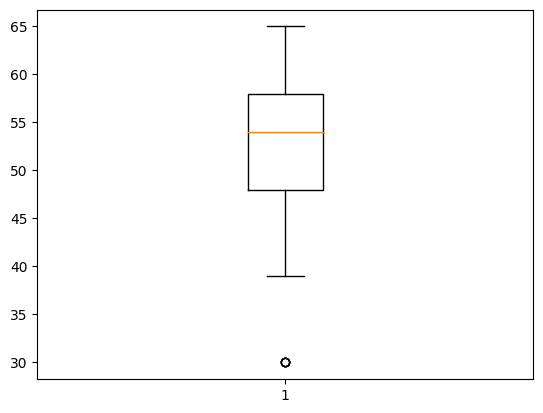

In [ ]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7969c3eaa4a0>,
 'caps': [<matplotlib.lines.Line2D at 0x7969c3eaa920>,
 'boxes': [<matplotlib.lines.Line2D at 0x7969c3eaa200>],
 'medians': [<matplotlib.lines.Line2D at 0x7969c3eaad40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7969c3eaafe0>],
 'means': []}

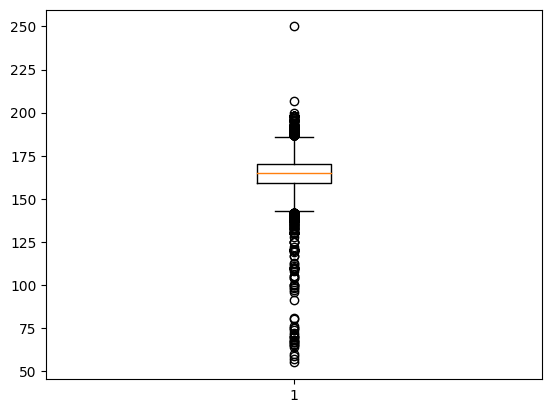

In [ ]:
plt.boxplot(df['height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7969c3d271c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7969c3d27730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7969c3d26f20>],
 'medians': [<matplotlib.lines.Line2D at 0x7969c3d27c70>],
 'fliers': [<matplotlib.lines.Line2D at 0x7969c3d27f10>],
 'means': []}

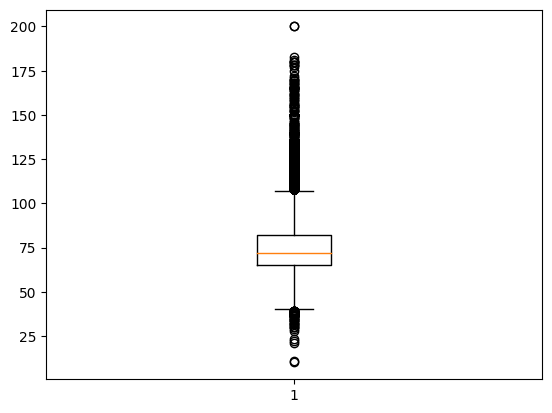

In [ ]:
plt.boxplot(df['weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7969c3d9ae30>,
 'caps': [<matplotlib.lines.Line2D at 0x7969c3d9b370>,
 'boxes': [<matplotlib.lines.Line2D at 0x7969c3d9ab90>],
 'medians': [<matplotlib.lines.Line2D at 0x7969c3d9b8b0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7969c3d9bb50>],
 'means': []}

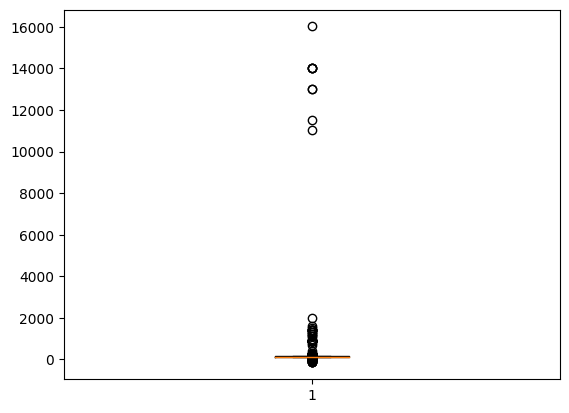

In [ ]:
plt.boxplot(df['ap_hi'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7969c3c27ca0>,
 'caps': [<matplotlib.lines.Line2D at 0x7969c3c50220>,
 'boxes': [<matplotlib.lines.Line2D at 0x7969c3c27a00>],
 'medians': [<matplotlib.lines.Line2D at 0x7969c3c50760>],
 'fliers': [<matplotlib.lines.Line2D at 0x7969c3c50a00>],
 'means': []}

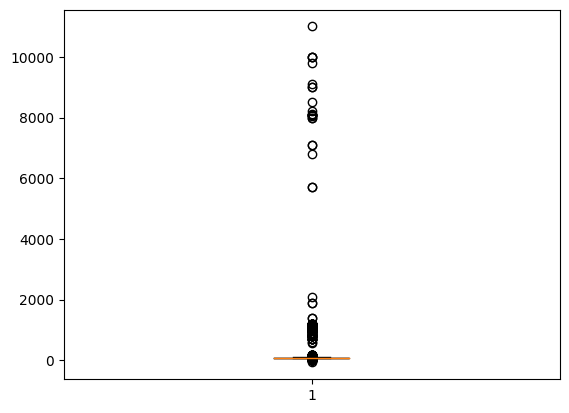

In [ ]:
plt.boxplot(df['ap_lo'])

In [ ]:
df.drop(df[(df['height'] > df['height'].quantile(0.975)) | (df['height'] < df['height'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['weight'] > df['weight'].quantile(0.975)) | (df['weight'] < df['weight'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['age'] > df['age'].quantile(0.975)) | (df['age'] < df['age'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_hi'] > df['ap_hi'].quantile(0.975)) | (df['ap_hi'] < df['ap_hi'].quantile(0.025))].index,inplace=True)
df.drop(df[(df['ap_lo'] > df['ap_lo'].quantile(0.975)) | (df['ap_lo'] < df['ap_lo'].quantile(0.025))].index,inplace=True)

In [ ]:
df.shape

(59501, 13)

{'whiskers': [<matplotlib.lines.Line2D at 0x7969c3cae590>,
 'caps': [<matplotlib.lines.Line2D at 0x7969c3caead0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7969c3cae2f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7969c3caf010>],
 'fliers': [<matplotlib.lines.Line2D at 0x7969c3caf2b0>],
 'means': []}

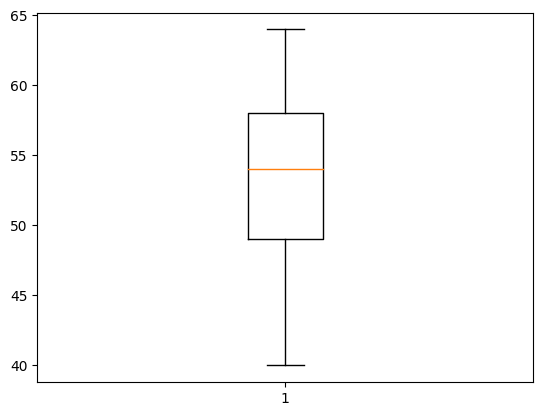

In [ ]:
plt.boxplot(df['age'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7969c3b25660>,
 'caps': [<matplotlib.lines.Line2D at 0x7969c3b25ba0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7969c3b253c0>],
 'medians': [<matplotlib.lines.Line2D at 0x7969c3b25fc0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7969c3b26260>],
 'means': []}

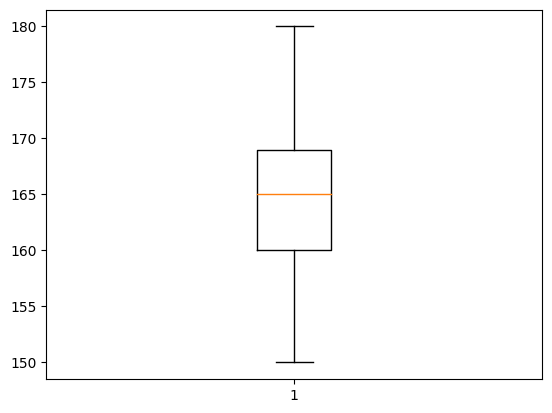

In [ ]:
plt.boxplot(df['height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7969c3ba09d0>,
 'caps': [<matplotlib.lines.Line2D at 0x7969c3ba0e80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7969c3ba0730>],
 'medians': [<matplotlib.lines.Line2D at 0x7969c3ba13c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7969c3ba1690>],
 'means': []}

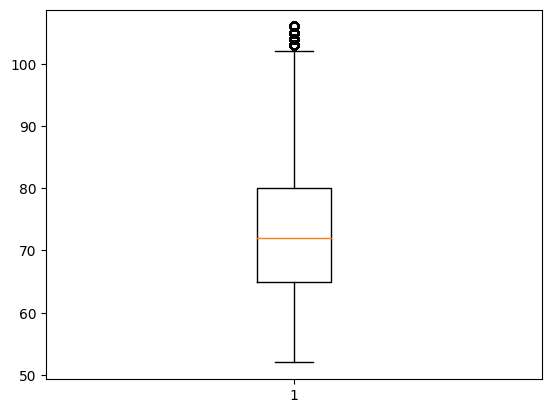

In [ ]:
plt.boxplot(df['weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7969c106b940>,
 'caps': [<matplotlib.lines.Line2D at 0x7969c106be80>,
 'boxes': [<matplotlib.lines.Line2D at 0x7969c106b6a0>],
 'medians': [<matplotlib.lines.Line2D at 0x7969c10a0400>],
 'fliers': [<matplotlib.lines.Line2D at 0x7969c10a06a0>],
 'means': []}

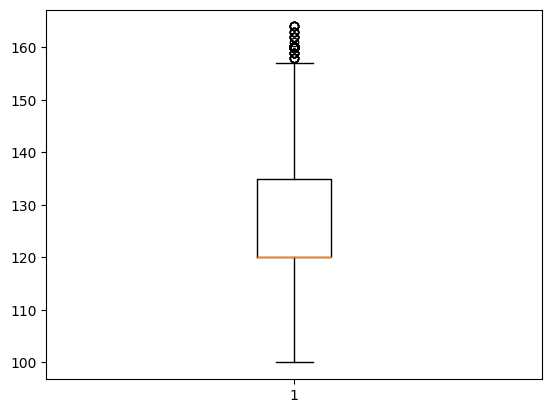

In [ ]:
plt.boxplot(df['ap_hi'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7969c10decb0>,
 'caps': [<matplotlib.lines.Line2D at 0x7969c10df1f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7969c10dea10>],
 'medians': [<matplotlib.lines.Line2D at 0x7969c10df730>],
 'fliers': [<matplotlib.lines.Line2D at 0x7969c10df9d0>],
 'means': []}

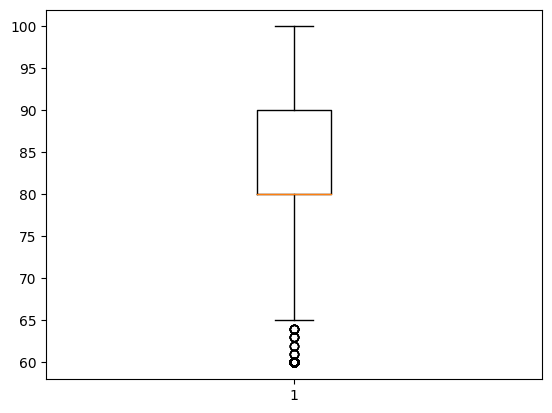

In [ ]:
plt.boxplot(df['ap_lo'])

In [ ]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
corr

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,1.000000,0.002456,0.003779,-0.000305,0.002298,0.007918,0.003195,0.006255,0.003404,-0.001268,-0.001839,0.006401,0.004801
age,0.002456,1.000000,-0.024716,-0.083084,0.064869,0.202518,0.143999,0.153879,0.096967,-0.047098,-0.027235,-0.011941,0.232709
gender,0.003779,-0.024716,1.000000,0.501863,0.129134,0.043869,0.049214,-0.041705,-0.024049,0.337492,0.167326,0.006611,-0.004502
height,-0.000305,-0.083084,0.501863,1.000000,0.247937,-0.011376,0.007134,-0.069436,-0.030128,0.185035,0.087341,-0.005217,-0.030589
weight,0.002298,0.064869,0.129134,0.247937,1.000000,0.231130,0.210638,0.129651,0.088095,0.055236,0.056825,-0.011730,0.158691
ap_hi,0.007918,0.202518,0.043869,-0.011376,0.231130,1.000000,0.695363,0.186781,0.082885,0.020785,0.023811,0.002331,0.427598
ap_lo,0.003195,0.143999,0.049214,0.007134,0.210638,0.695363,1.000000,0.146322,0.061057,0.018844,0.026384,0.000823,0.320796
cholesterol,0.006255,0.153879,-0.041705,-0.069436,0.129651,0.186781,0.146322,1.000000,0.453638,0.004482,0.026209,0.007748,0.216299
gluc,0.003404,0.096967,-0.024049,-0.030128,0.088095,0.082885,0.061057,0.453638,1.000000,-0.009832,0.004361,-0.007196,0.085321
smoke,-0.001268,-0.047098,0.337492,0.185035,0.055236,0.020785,0.018844,0.004482,-0.009832,1.000000,0.341736,0.026596,-0.023205


<ipython-input-21-8f55b9b56bbe>:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


<Axes: >

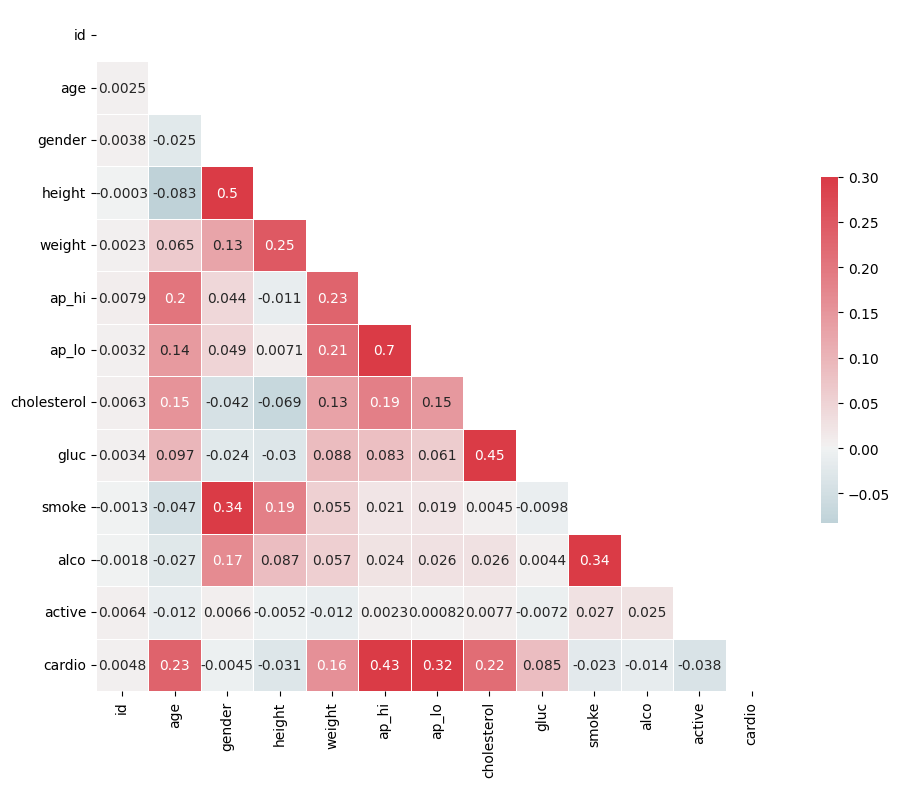

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,2,168,62,110,80,1,1,0,0,1,0
1,1,55.0,1,156,85,140,90,3,1,0,0,1,1
2,2,52.0,1,165,64,130,70,3,1,0,0,0,1
3,3,48.0,2,169,82,150,100,1,1,0,0,1,1
4,4,48.0,1,156,56,100,60,1,1,0,0,0,0


In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']] = scale.fit_transform(df[['age', 'height', 'weight', 'ap_hi', 'ap_lo']])

In [ ]:
X = df.drop(['cardio','id'], axis=1)
y = df['cardio']

In [ ]:
print(X)

        age  gender  height  weight  ap_hi  ap_lo  cholesterol  gluc  smoke  \
0      50.0       2     168      62    110     80            1     1      0   
1      55.0       1     156      85    140     90            3     1      0   
2      52.0       1     165      64    130     70            3     1      0   
3      48.0       2     169      82    150    100            1     1      0   
4      48.0       1     156      56    100     60            1     1      0   
...     ...     ...     ...     ...    ...    ...          ...   ...    ...   
69993  54.0       1     172      70    130     90            1     1      0   
69994  58.0       1     165      80    150     80            1     1      0   
69995  53.0       2     168      76    120     80            1     1      1   
69998  61.0       1     163      72    135     80            1     2      0   
69999  56.0       1     170      72    120     80            2     1      0   

       alco  active  
0         0       1  
1      

In [ ]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,stratify=y, random_state=2)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
k_model = KNeighborsClassifier()
k_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
cross_validate(k_model, X, y, cv=5)['test_score'].mean()*100

67.92323305929379

In [ ]:
k_pred = k_model.predict(X_test)
print(classification_report(y_test, k_pred))
print(f"score: {round((accuracy_score(k_pred, y_test)*100),2)}%")

              precision    recall  f1-score   support

           0       0.68      0.71      0.70      6083
           1       0.68      0.65      0.67      5818

    accuracy                           0.68     11901
   macro avg       0.68      0.68      0.68     11901
weighted avg       0.68      0.68      0.68     11901

score: 68.09%


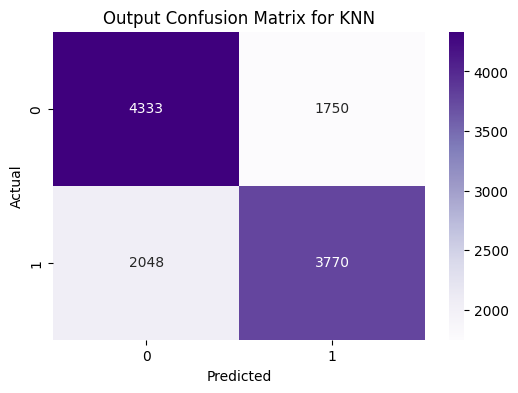

In [ ]:
cm = confusion_matrix(y_test, k_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
fg = sns.heatmap(cm, annot=True, cmap="Purples", fmt='d')
figure = fg.get_figure()

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix for KNN")
plt.show()

In [ ]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
n_pred = gnb.predict(X_test)

In [ ]:
#from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, n_pred)*100)

Accuracy: 71.2713217376691


In [ ]:
n_pred = gnb.predict(X_test)
print(classification_report(y_test, n_pred))
print(f"score: {round((accuracy_score(n_pred, y_test)*100),2)}%")

              precision    recall  f1-score   support

           0       0.69      0.81      0.74      6083
           1       0.76      0.61      0.67      5818

    accuracy                           0.71     11901
   macro avg       0.72      0.71      0.71     11901
weighted avg       0.72      0.71      0.71     11901

score: 71.27%


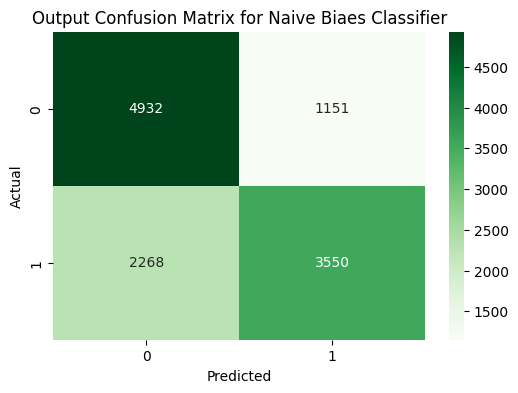

In [ ]:
cm = confusion_matrix(y_test, n_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
fg = sns.heatmap(cm, annot=True, cmap="Greens", fmt='d')
figure = fg.get_figure()

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix for Naive Biaes Classifier")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train, y_train)
l_pred = log.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, l_pred)*100)

Accuracy: 71.0444500462146


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
l_pred = log.predict(X_test)
print(classification_report(y_test, l_pred))
print(f"score: {round((accuracy_score(l_pred, y_test)*100),2)}%")

              precision    recall  f1-score   support

           0       0.70      0.77      0.73      6083
           1       0.73      0.65      0.69      5818

    accuracy                           0.71     11901
   macro avg       0.71      0.71      0.71     11901
weighted avg       0.71      0.71      0.71     11901

score: 71.04%


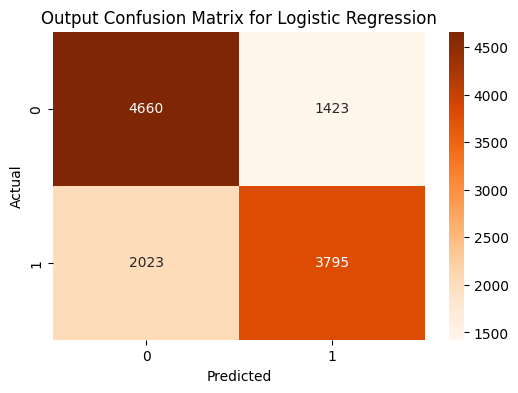

In [ ]:
cm = confusion_matrix(y_test, l_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
fg = sns.heatmap(cm, annot=True, cmap="Oranges", fmt='d')
figure = fg.get_figure()

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix for Logistic Regression")
plt.show()

In [ ]:
from sklearn import svm
svm = svm.SVC()
svm.fit(X_train, y_train)
s_pred = svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, s_pred)*100)

Accuracy: 71.11167128812704


In [ ]:
s_pred = svm.predict(X_test)
print(classification_report(y_test, s_pred))
print(f"score: {round((accuracy_score(s_pred, y_test)*100),2)}%")

              precision    recall  f1-score   support

           0       0.67      0.84      0.75      6083
           1       0.78      0.57      0.66      5818

    accuracy                           0.71     11901
   macro avg       0.73      0.71      0.70     11901
weighted avg       0.72      0.71      0.71     11901

score: 71.11%


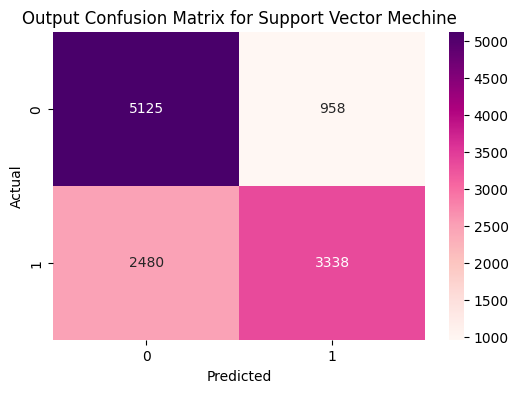

In [ ]:
cm = confusion_matrix(y_test, s_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
fg = sns.heatmap(cm, annot=True, cmap="RdPu", fmt='d')
figure = fg.get_figure()

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix for Support Vector Mechine")
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)
d_pred=dt.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,d_pred)*100)

Accuracy: 62.49054701285607


In [ ]:
d_pred = dt.predict(X_test)
print(classification_report(y_test, d_pred))
print(f"score: {round((accuracy_score(d_pred, y_test)*100),2)}%")

              precision    recall  f1-score   support

           0       0.63      0.65      0.64      6083
           1       0.62      0.60      0.61      5818

    accuracy                           0.62     11901
   macro avg       0.62      0.62      0.62     11901
weighted avg       0.62      0.62      0.62     11901

score: 62.49%


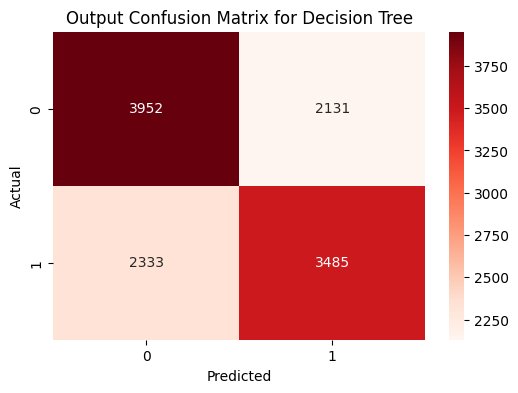

In [ ]:
cm = confusion_matrix(y_test, d_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
fg = sns.heatmap(cm, annot=True, cmap="Reds", fmt='d')
figure = fg.get_figure()

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix for Decision Tree")
plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
r_pred=rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,r_pred)*100)

Accuracy: 69.84287034702966


In [ ]:
r_pred = rf.predict(X_test)
print(classification_report(y_test, r_pred))
print(f"score: {round((accuracy_score(r_pred, y_test)*100),2)}%")

              precision    recall  f1-score   support

           0       0.70      0.71      0.71      6083
           1       0.69      0.69      0.69      5818

    accuracy                           0.70     11901
   macro avg       0.70      0.70      0.70     11901
weighted avg       0.70      0.70      0.70     11901

score: 69.84%


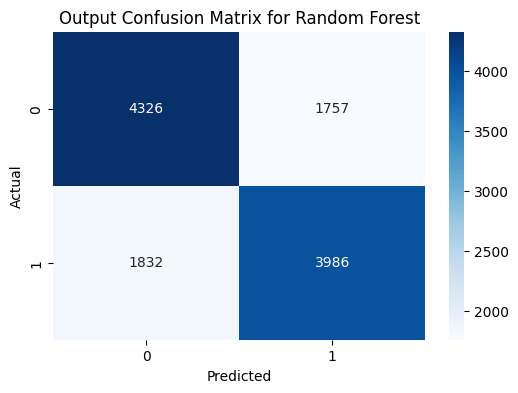

In [ ]:
cm = confusion_matrix(y_test, r_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
fg = sns.heatmap(cm, annot=True, cmap="Blues", fmt='d')
figure = fg.get_figure()

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix for Random Forest")
plt.show()

In [ ]:
df.shape

(59501, 13)

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()
gbc.fit(X_train,y_train)

X_train_prediction = gbc.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, y_train)

g_pred=gbc.predict(X_test)
print("Accuracy:",metrics.accuracy_score(g_pred,y_test)*100)

Accuracy: 73.02747668263171


In [ ]:
g_pred = gbc.predict(X_test)
print(classification_report(y_test, g_pred))
print(f"score: {round((accuracy_score(g_pred, y_test)*100),2)}%")

              precision    recall  f1-score   support

           0       0.72      0.78      0.75      6083
           1       0.75      0.68      0.71      5818

    accuracy                           0.73     11901
   macro avg       0.73      0.73      0.73     11901
weighted avg       0.73      0.73      0.73     11901

score: 73.03%


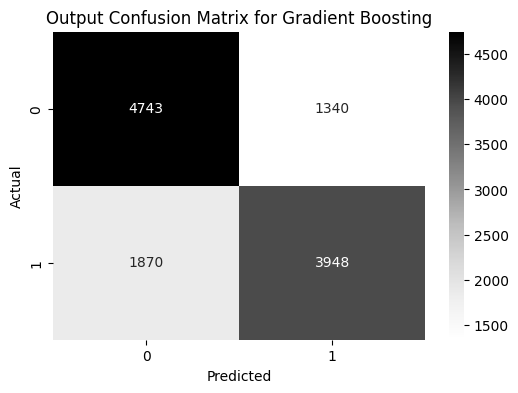

In [ ]:
cm = confusion_matrix(y_test, g_pred)

# Plot the confusion matrix heatmap
plt.figure(figsize=(6, 4))
fg = sns.heatmap(cm, annot=True, cmap="Greys", fmt='d')
figure = fg.get_figure()

# Add labels and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title("Output Confusion Matrix for Gradient Boosting")
plt.show()

In [ ]:
final_data=pd.DataFrame({'Models':['KNN','NB','LR','SVM','DT','RF','GB'],'Accuracy(%)':[accuracy_score(y_test,k_pred)*100,accuracy_score(y_test,n_pred)*100,accuracy_score(y_test,l_pred)*100,accuracy_score(y_test,s_pred)*100,accuracy_score(y_test,d_pred)*100,accuracy_score(y_test,r_pred)*100,accuracy_score(y_test,g_pred)*100]})
final_data

,Models,Accuracy(%)
0,KNN,68.086715
1,NB,71.271322
2,LR,71.044450
3,SVM,71.111671
4,DT,62.490547
5,RF,69.842870
6,GB,73.027477


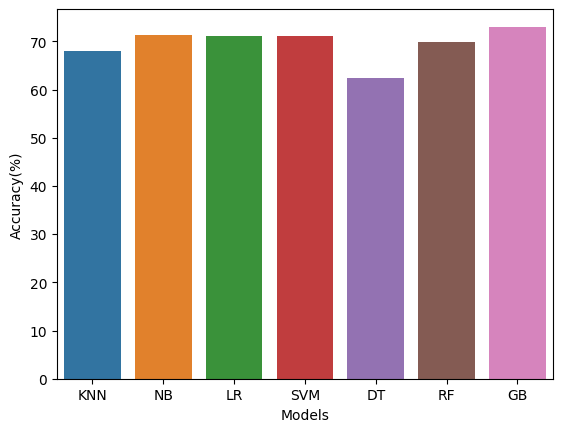

In [54]:
sns.barplot(x=final_data['Models'],y=final_data['Accuracy(%)'])
plt.show()

In [55]:
import numpy as np

# Assuming gbc is your GradientBoostingClassifier
input_data = np.array([55, 1, 156, 85, 140, 90, 3, 1, 0, 0, 1])

# Reshape the numpy array as we are predicting for only one instance
input_data_reshaped = input_data.reshape(1, -1)

prediction = gbc.predict(input_data_reshaped)
print(prediction)

prediction_value = int(prediction[0])
if prediction_value == 0:
    print('The Person does not have a Heart Disease')
else:
    print('The Person has Heart Disease')


[1]
The Person has Heart Disease


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(


In [56]:
import pickle
filename="heart disease_model3.sav"
pickle.dump(gbc,open(filename,'wb'))

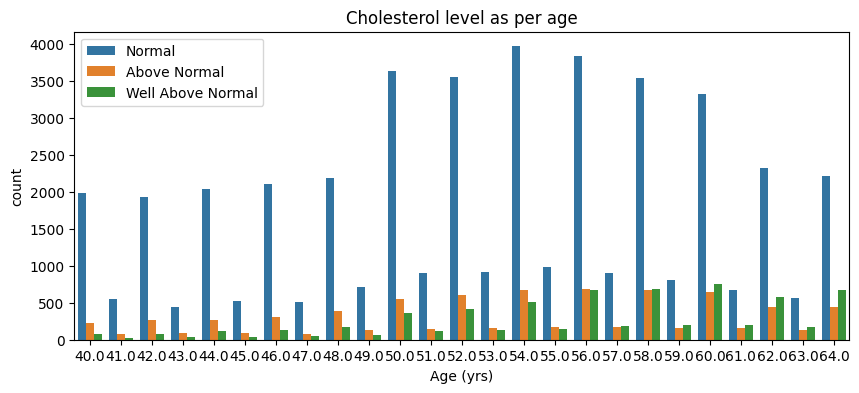

In [57]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "cholesterol")
plt.title("Cholesterol level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

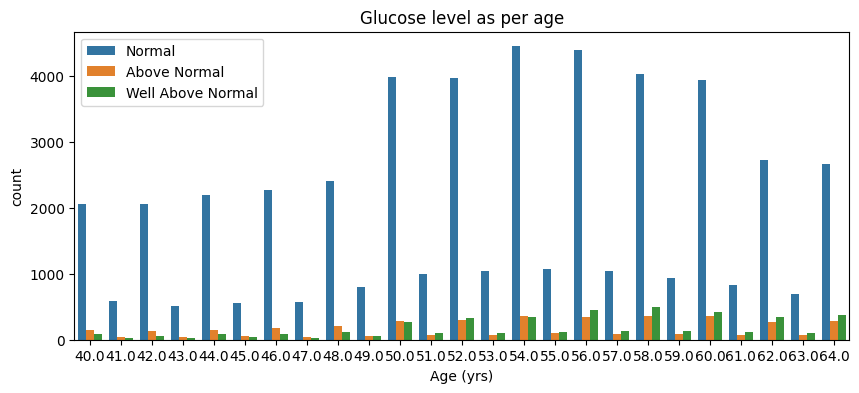

In [58]:
# Plotting age with respect to glucose level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "gluc")
plt.title("Glucose level as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

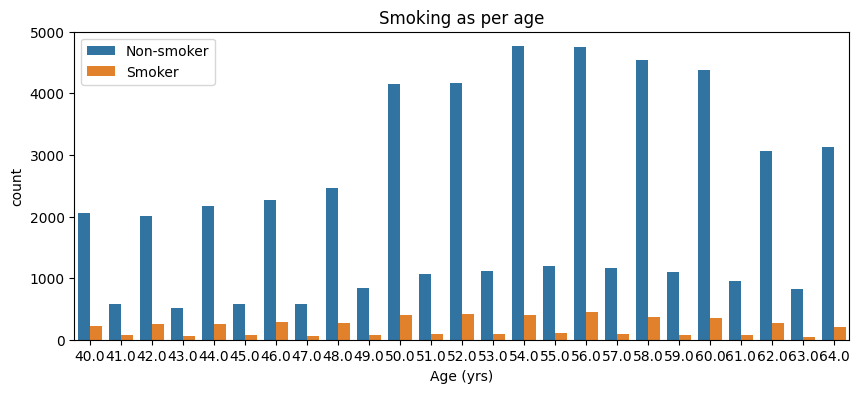

In [59]:
# Plotting age with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "smoke")
plt.title("Smoking as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Non-smoker", "Smoker"])

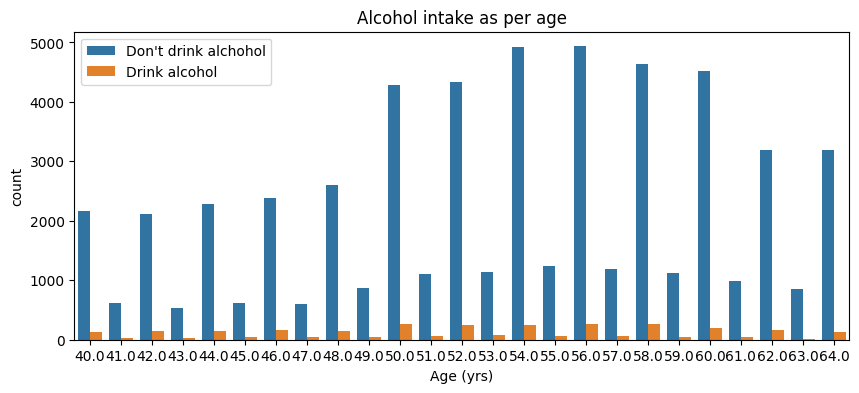

In [60]:
# Plotting age with respect to alcohol consumption.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "alco")
plt.title("Alcohol intake as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Don't drink alchohol", "Drink alcohol"])

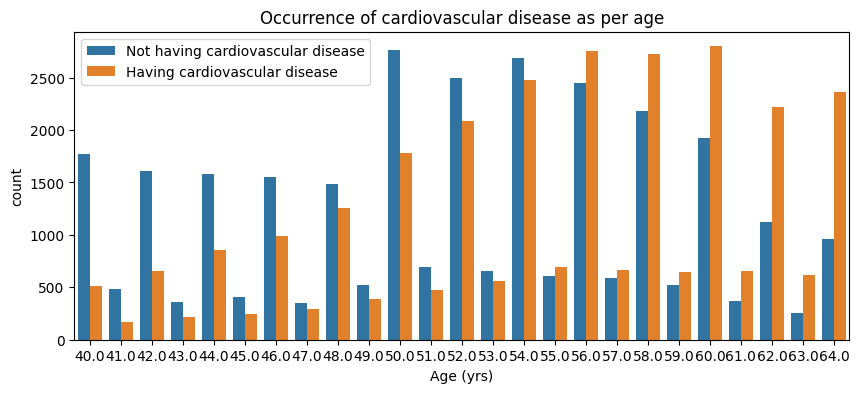

In [61]:
# Plotting age with respect to occurrence of cardiovascular disease.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "age",  hue = "cardio")
plt.title("Occurrence of cardiovascular disease as per age")
plt.xlabel("Age (yrs)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

Text(0, 0.5, 'Blood Pressure (mmHg)')

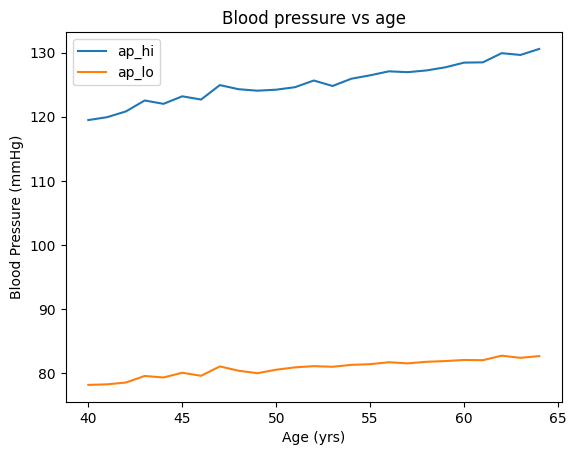

In [62]:
# Plotting age with respect to the blood pressure (both systolic and diastolic)
df.groupby("age")[[ "ap_hi", "ap_lo"]].mean().plot()
plt.title("Blood pressure vs age")
plt.xlabel("Age (yrs)")
plt.ylabel("Blood Pressure (mmHg)")

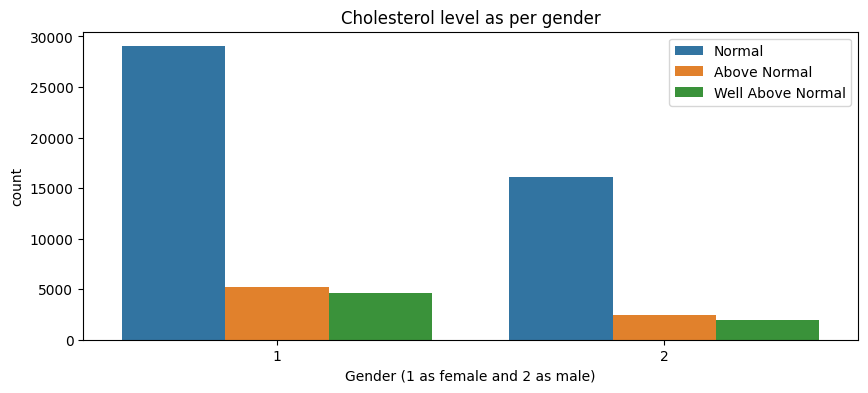

In [63]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "cholesterol")
plt.title("Cholesterol level as per gender")
plt.xlabel("Gender (1 as female and 2 as male)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

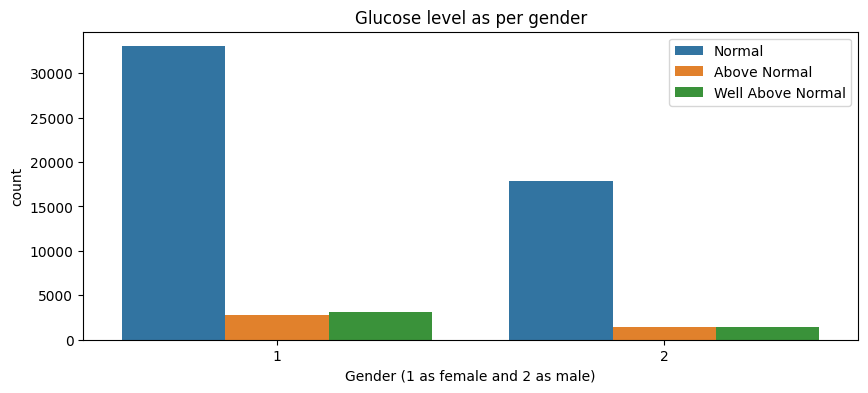

In [64]:
# Plotting gender with respect to glucose level.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "gluc")
plt.title("Glucose level as per gender")
plt.xlabel("Gender (1 as female and 2 as male)")
plt.legend(["Normal", "Above Normal", "Well Above Normal"])

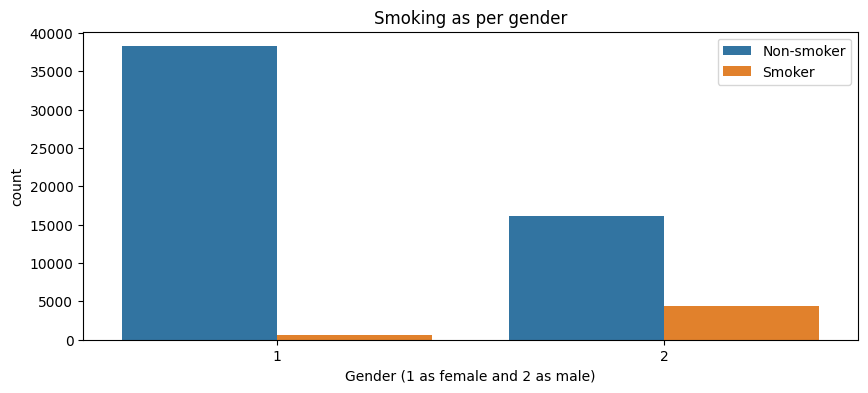

In [65]:
# Plotting gender with respect to smoking.
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "smoke")
plt.title("Smoking as per gender")
plt.xlabel("Gender (1 as female and 2 as male)")
plt.legend(["Non-smoker", "Smoker"])

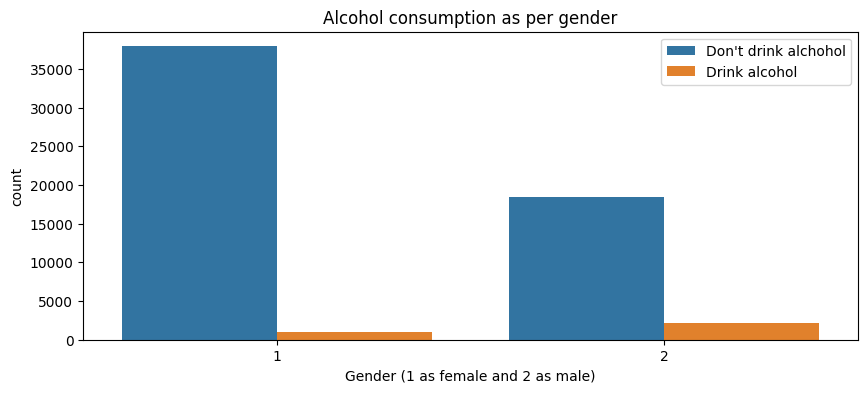

In [66]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "alco")
plt.title("Alcohol consumption as per gender")
plt.xlabel("Gender (1 as female and 2 as male)")
plt.legend(["Don't drink alchohol", "Drink alcohol"])

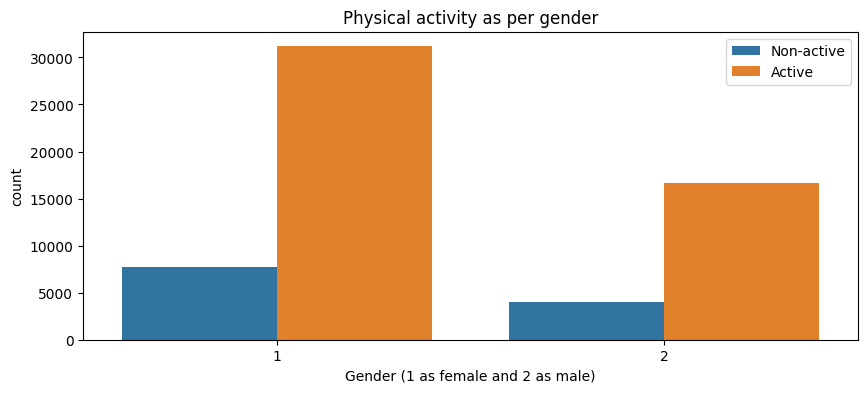

In [67]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "active")
plt.title("Physical activity as per gender")
plt.xlabel("Gender (1 as female and 2 as male)")
plt.legend(["Non-active", "Active"])

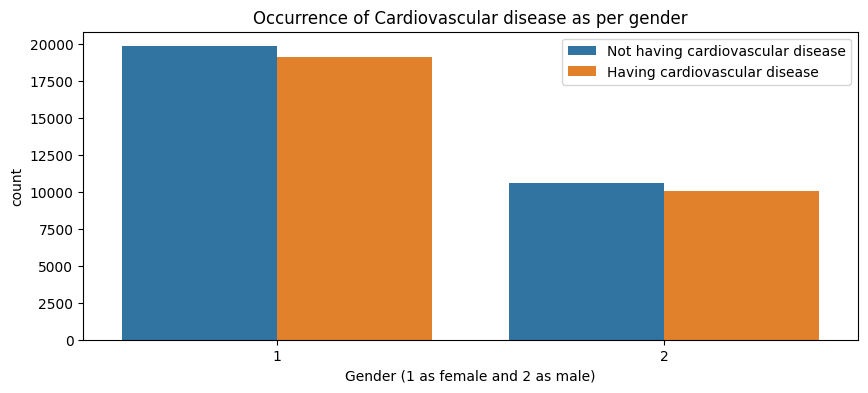

In [68]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gender",  hue = "cardio")
plt.title("Occurrence of Cardiovascular disease as per gender")
plt.xlabel("Gender (1 as female and 2 as male)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

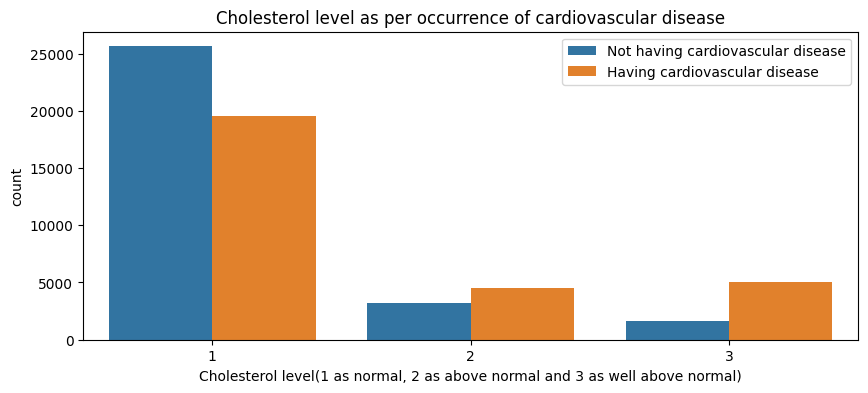

In [69]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "cholesterol",  hue = "cardio")
plt.title("Cholesterol level as per occurrence of cardiovascular disease")
plt.xlabel("Cholesterol level(1 as normal, 2 as above normal and 3 as well above normal)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

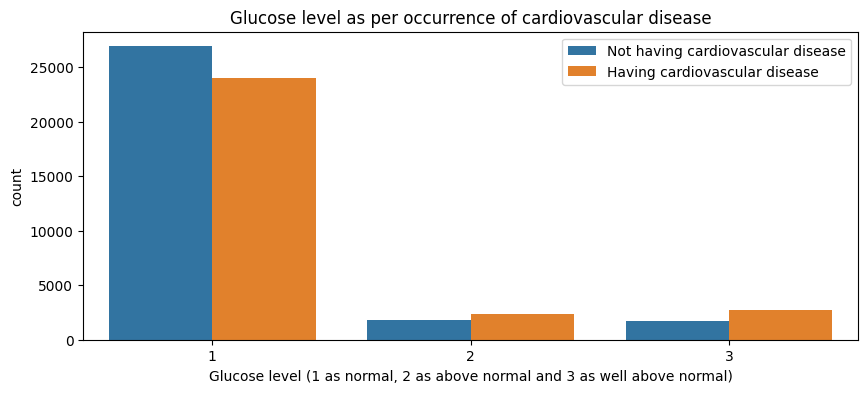

In [70]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "gluc",  hue = "cardio")
plt.title("Glucose level as per occurrence of cardiovascular disease")
plt.xlabel("Glucose level (1 as normal, 2 as above normal and 3 as well above normal)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

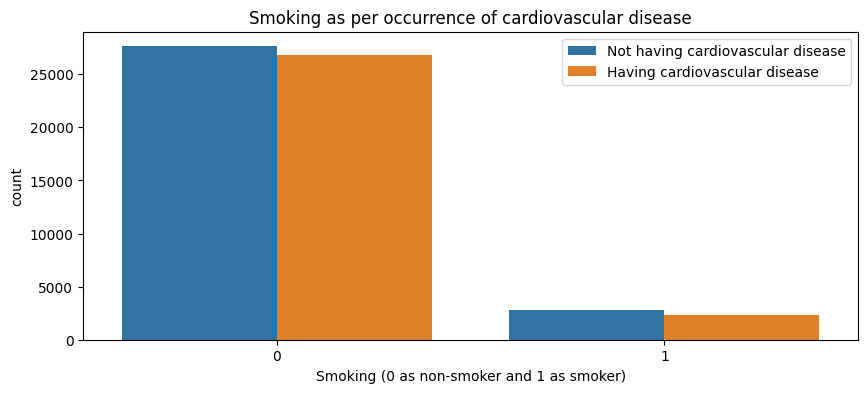

In [71]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "smoke",  hue = "cardio")
plt.title("Smoking as per occurrence of cardiovascular disease")
plt.xlabel("Smoking (0 as non-smoker and 1 as smoker)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

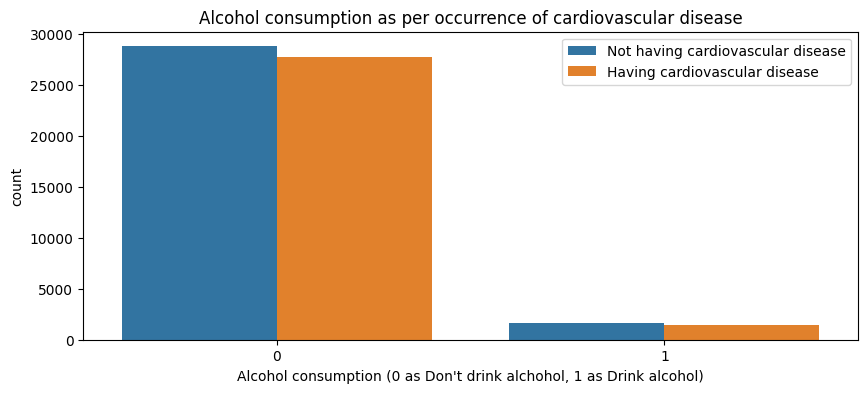

In [72]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "alco",  hue = "cardio")
plt.title("Alcohol consumption as per occurrence of cardiovascular disease")
plt.xlabel("Alcohol consumption (0 as Don't drink alchohol, 1 as Drink alcohol)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])

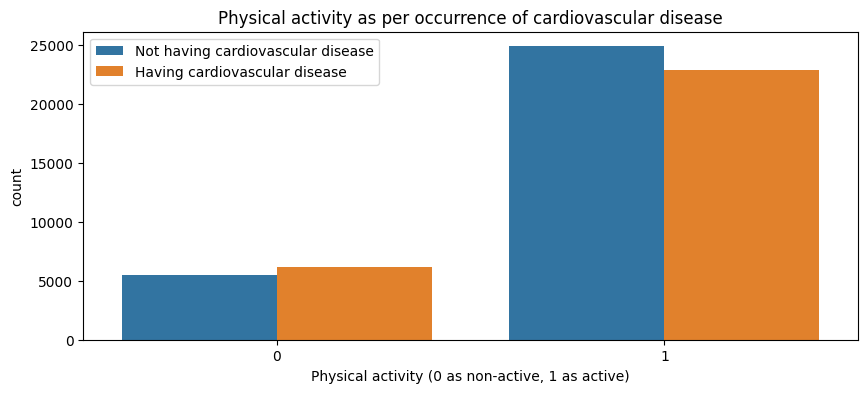

In [73]:
plt.figure(figsize = (10,4))
sns.countplot(data = df, x = "active",  hue = "cardio")
plt.title("Physical activity as per occurrence of cardiovascular disease")
plt.xlabel("Physical activity (0 as non-active, 1 as active)")
plt.legend(["Not having cardiovascular disease", "Having cardiovascular disease"])